In [1]:
import random
import math
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

Para este ejercicio usaremos el método de Aceptación - Rechazo

In [2]:
media = 15 # dato del enunciado
desvio = 2 # dato del enunciado
muestras = 100_000 # dato del enunciado
c = 1.3 # es fx/fy que maximiza el cociente

In [3]:
resultados = []

def cociente(t):
    # es la division de fx/c*fy
    return (1 / math.sqrt(2 * math.pi)) * math.exp(t - (t**2 / 2)) * 1/c

for i in range(muestras):
    t = random.expovariate(1) # muestra exponencial de media 1
    u = random.random()
    if u < cociente(t):
        u2 = random.random()
        if u2 < 0.5:
            resultados.append(t)
        else:
            resultados.append(-t)

In [4]:
# aplicamos transformacion de Normal std a lo pedido
transformada = [r * desvio + media for r in resultados]

In [5]:
print(f'Esperanza real: {media} - Esperanza simulada: {np.mean(transformada)}')
print(f'Varianza real: {desvio**2} - Varianza simulada: {np.var(transformada)}')


Esperanza real: 15 - Esperanza simulada: 15.00429740565675
Varianza real: 4 - Varianza simulada: 3.997152484896918


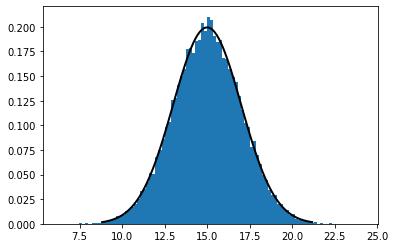

In [6]:
# creo la normal real para plotear la curva y comparar
x_real = np.linspace(norm.ppf(0.001, media, desvio), norm.ppf(0.999, media, desvio), 100)
fig, ax = plt.subplots(1, 1)

y_real = norm(media, desvio)
ax.plot(x_real, y_real.pdf(x_real), 'k-', lw = 2)

ax.hist(transformada, 100, density=True)
plt.show()

Para verificar si los numeros generados siguen la distribución pedida se puede usar un test de frecuencia, ya que estos tests justamente buscan comprobar que los numeros generados se distribuyan siguiendo la función de probabilidad esperada.

In [9]:
transformada[0:10]

[13.432844083022523,
 16.424534394423418,
 16.38400766756955,
 14.32243189305854,
 17.423057448239124,
 15.546269576429959,
 17.289122654895053,
 10.718426514664145,
 12.399608559735746,
 13.709554966411863]